# Equity Investment Portfolio Optimization - Stocks in Bombay Stock Exchange

The following notebook demonstrates optimization over allocation of capital on stocks in the portfolio. Intially, random ratios of capital are allocated to the stocks in the portfolio and then we'll optimize those allocations to maximize our profits.

We will be holding the stocks in the portfolio for about two years. (1st January 2017 to 1st January 2019)

For the scope of this study, the portfolio contains following stocks from different industries listed in Bombay Stock Exchange:

<html>
<table style="border: 2px black solid; font-size: 15px; font-family: serif;">
<caption style="color: black; font-family: arial; font-size: 20px">Portfolio Structure</caption>
<tr><th>Company</th><th>Sector</th></tr>
<tr><td>Infosys</td><td>Information Technology</td></tr>
<tr><td>Bharti Airtel</td><td>Telecommunications</td></tr>
<tr><td>Sun Pharma.</td><td>Pharmaceuticals</td></tr>
<tr><td>Ultratech Cements</td><td>Cements</td></tr>
<tr><td>Finolex Industries</td><td>Petrochemicals</td></tr>
<tr><td>Vedanta</td><td>Mining and Minerals</td></tr>
</table>
<br />
<br />
</html>
Note: A portfolio is basically a collection of stocks in which you invest some parts of your assets. It is usually suggested to keep one's portfolio diversified ie. including stocks of different industries, in order to minimize the risks and losses.

Importing the modules and defining the stock identifiers needed:

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import quandl as qd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import scipy.optimize as spo

api_key = "get your key"

stock_identifiers = ["BSE/BOM500209", "BSE/BOM532454", "BSE/BOM532872", \
                 "BSE/BOM532538", "BSE/BOM500940", "BSE/BOM500295"]

stock_names = ["Infosys", "Bharti_Airtel", "Sun_Pharma", \
                 "Ultratech_Cements", "Finolex_Industries", "Vedanta"]

Importing the data from Quandl and constructing the dataframe:
<br />
<br />
Note: We consider only the Closing prices of the stocks.

In [2]:
all_data = DataFrame(columns = stock_names)

for i in range(len(stock_identifiers)):
    temp = qd.get(stock_identifiers[i], authtoken = api_key, start_date="2017-01-01", end_date="2019-01-01")
    temp = temp['Close']
    all_data[stock_names[i]] = temp

A brief look at the database:

In [3]:
all_data.head(5)

,Infosys,Bharti_Airtel,Sun_Pharma,Ultratech_Cements,Finolex_Industries,Vedanta
Date,,,,,,
2017-01-02,1001.60,311.00,304.35,3364.65,438.50,220.85
2017-01-03,994.65,303.65,309.40,3327.60,445.10,219.75
2017-01-04,998.30,314.20,306.35,3298.90,441.25,216.95
2017-01-05,996.40,321.15,307.75,3380.10,440.85,227.10
2017-01-06,971.45,319.90,307.90,3330.50,444.90,230.35


Let us check if we have any missing values over the period of time:

In [4]:
all_data.isna().sum()

Infosys               0
Bharti_Airtel         0
Sun_Pharma            0
Ultratech_Cements     0
Finolex_Industries    0
Vedanta               0
dtype: int64

Let us now have a quick look at the plot of Closing prices of each stocks:

Text(0.5,1,'Infosys Closing Prices')

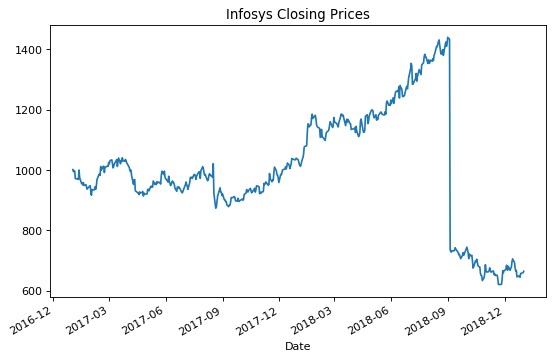

In [5]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Infosys'].plot()
ax.set_title("Infosys Closing Prices")

Text(0.5,1,'Bharti Airtel Closing Prices')

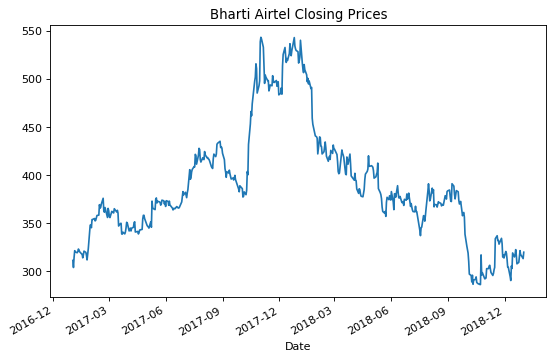

In [6]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Bharti_Airtel'].plot()
ax.set_title("Bharti Airtel Closing Prices")

Text(0.5,1,'Sun Pharma. Closing Prices')

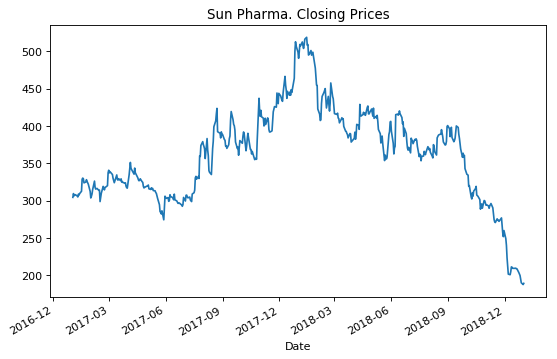

In [7]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Sun_Pharma'].plot()
ax.set_title("Sun Pharma. Closing Prices")

Text(0.5,1,'Ultratech Cements Closing Prices')

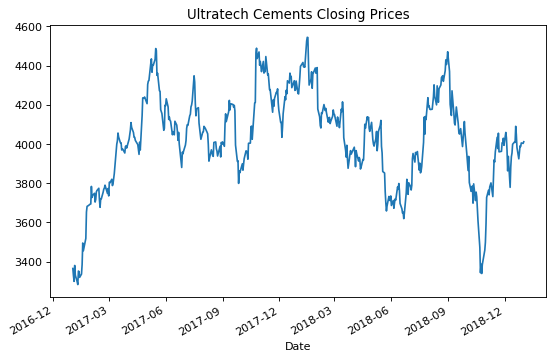

In [8]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Ultratech_Cements'].plot()
ax.set_title("Ultratech Cements Closing Prices")

Text(0.5,1,'Finolex Industries Closing Prices')

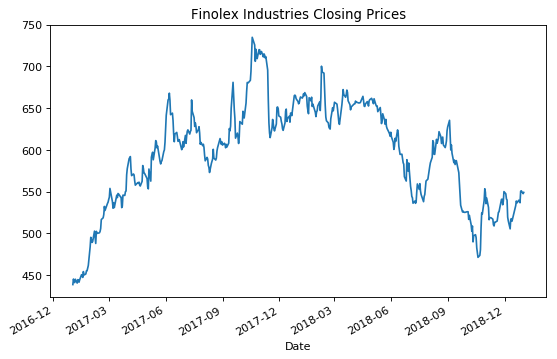

In [9]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Finolex_Industries'].plot()
ax.set_title("Finolex Industries Closing Prices")

Text(0.5,1,'Vedanta Closing Prices')

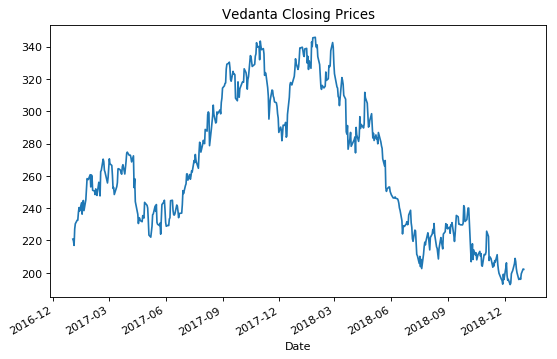

In [10]:
plt.figure(figsize=(8,5), dpi=80)
ax  = all_data['Vedanta'].plot()
ax.set_title("Vedanta Closing Prices")

If we notice the plot of Infosys closing prices, we can see that in September 2018, the prices dropped by approximately 50%. 

Let's have a precise look. We'll monitor the prices from 15th August for 20 days

In [11]:
temp = all_data['Infosys']
temp['2018-08-15':].head(20)

Date
2018-08-16    1425.30
2018-08-17    1431.35
2018-08-20    1385.20
2018-08-21    1384.30
2018-08-23    1399.20
2018-08-24    1379.95
2018-08-27    1414.90
2018-08-28    1424.35
2018-08-29    1410.35
2018-08-30    1417.50
2018-08-31    1440.00
2018-09-03    1433.45
2018-09-04     735.65
2018-09-05     729.80
2018-09-06     727.95
2018-09-07     733.15
2018-09-10     731.95
2018-09-11     734.25
2018-09-12     742.70
2018-09-14     735.20
Name: Infosys, dtype: float64

Notice that the closing prices suddenly dropped to half from 4th September 2018.

If we follow some news on Infosys during those days, we learn that Infosys announced 1:1 bonus issue to mark their 25 years since first listing. Learn more about it <a href="https://www.moneycontrol.com/news/business/markets/infosys-q1-it-major-announces-11-bonus-issue-to-mark-25-years-since-listing-2709761.html">here</a>.

From numerical perspective, it means that the prices fell by 50% and hence a loss. But during issuing of bonus, let's say at 1:1, you get an additional share for every share you own. ie. X shares with value Y will become 2X shares with value Y/2, so that net in-hand value remains the same. This increases the liquidity in the market and results in increment of quantities traded.

So to avoid the interpretation of decrement in closing price as a loss, we will double the values from 4th September onwards.

Note: This means that we will assume no bonus was issued and the prices remained almost same.

In [12]:
temp['2018-09-04':]= temp['2018-09-04':]*2

Let's see if we've solved the ambiguity:

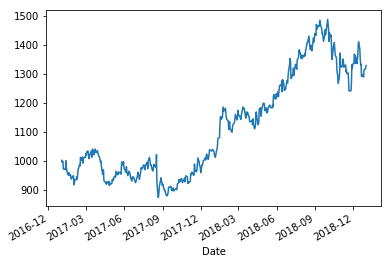

In [13]:
temp.plot()

Replacing the original Infosys data with the doubled one.

In [14]:
all_data['Infosys'] = temp

Creating a function to compute Daily returns of a stock:
    Basically, daily returns of the stock of a day, is calculated using formula:
        <pre>
        Today's stock price / Yesterday's stock price - 1
        </pre>
<br />
<br />
Note: We impute the zeroth row for each columns equal to 0 since the daily returns can only be computed from day 2.

In [15]:
def compute_daily_returns(df):
    df = df/df.shift(1) - 1
    df.iloc[0,:] = 0
    return df


Calculating the daily returns of our portfolio using the function we defined:

In [16]:
daily_returns = all_data.copy()
daily_returns = compute_daily_returns(daily_returns)
daily_returns.head(10)

,Infosys,Bharti_Airtel,Sun_Pharma,Ultratech_Cements,Finolex_Industries,Vedanta
Date,,,,,,
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,-0.006939,-0.023633,0.016593,-0.011012,0.015051,-0.004981
2017-01-04,0.003670,0.034744,-0.009858,-0.008625,-0.008650,-0.012742
2017-01-05,-0.001903,0.022120,0.004570,0.024614,-0.000907,0.046785
2017-01-06,-0.025040,-0.003892,0.000487,-0.014674,0.009187,0.014311
2017-01-09,-0.000926,-0.002813,-0.005196,-0.010074,-0.010339,0.009551
2017-01-10,0.000052,0.003448,-0.004571,-0.004353,0.009312,0.000000
2017-01-11,-0.001648,0.008591,0.012135,0.020989,-0.001013,0.020641
2017-01-12,0.032043,-0.003717,-0.003889,-0.000895,-0.005857,0.012640


Now, we need to optimize our portfolio for maximum profits. To do that, we need to provide a parameter or a metric over which we can optimize our portfolio.
<br />
There are many parameters of portfolio over which we can optimize:
<ul>
<li>Cumulative returns of the Portfolio</li>
<pre>
    Cumulative returns for N days:
    
    ( ( Prices on Day N - Prices on Day 1 )/ Prices on Day 1 ) - 1
</pre>

<li>Average Daily Returns of the Portfolio</li>
<pre>
    One can use mean() function over the daily returns of portfolio dataframe to check the average value.
</pre>
<li>Volatility or Riskiness of the Portfolio</li>
<pre>
    Riskiness/Volatility of a Portfolio over a period of time = Standard Deviation of Daily returns of the Portfolio for that period.
</pre>
<li>Sharpe Ratio</li>
<pre>
    Sharpe Ratio = &#8730;252 *(Average Daily Returns of the Portfolio - Risk Free Return Rate)/Volatility of the Portfolio
    <br />
    Here, we take square root of the value of period for calculating Sharpe Ratio. In a year, there are 252 trading days, so we take root of 252. The Sharpe ratios can also be calculated weekly, monthly, quarterly and so on.
</pre>
</ul>


<br />
We will optimize our portfolio over Sharpe Ratio. 
<br />
Note: Risk Free Return Rate is the % of interest on investment that we can expect during zero/no risk. Usually, RFRT is assumed as 0.

For maximization of profits in our Portfolio, we need to maximize the Sharpe ratio. Thus, we optimize the equation of Sharpe Ratio. We will be using <b>minimize</b> function provided by scipy.optimize module. 

<br />
But, if we provide the function of Sharpe ratio to the optimizer, it will simply return allocations for minimum Sharpe ratio whereas we want allocations for maximum of the same. Hence we multiply the sharpe ratio with -1 so that the optimizer minimizes the negative sharpe ratio, in turn, maximizes sharpe ratio.

<br />
Creating a function which will calculate Sharpe Ratio for our Portfolio:

In [17]:
def function_Sharpe(allocations, dataframe):
    dr = dataframe.copy()
    allocated = dr*allocations
    portfolio_value = allocated.sum(axis = 1)
    
    avg_daily_value = portfolio_value.mean(axis = 0)
    risk_portfolio = portfolio_value.std(axis = 0)
    risk_free_return_rate = 0
    
    portfolio_sharpe_ratio = ((252)**0.5)*((avg_daily_value - risk_free_return_rate)/risk_portfolio)
    return portfolio_sharpe_ratio*-1

Since the sum of our allocations over all the stock should be 1, we define a constraint function:

In [18]:
def cons(x):
    return x.sum()-1

Creating a function to optimize the portfolio:

In [19]:
def optimizer(data, function):
    copy = all_data.copy()
    seed = 1/len(all_data.columns)
    initial_guess = np.full((len(all_data.columns)),seed)
    boundaries = ((0,1),)*6
    imp_constraints = ({'type':'eq' , 'fun':cons})
    optimal = spo.minimize(function, initial_guess, args=(data,), method='SLSQP', options={'disp':True}, \
                           constraints = imp_constraints, bounds = boundaries)
    return optimal

In the <b>minimize</b> function used above, the 1st parameter is the function we want to minimize, in our case: the negative sharpe ratio equation. The second parameter is the initial allocations that we provide to the optimizer to start with. The third parameter is used to mention the data of the portfolio(the daily returns). Fourth parameters states the method to be used for optimizing the equation. The last parameter bounds mentions the boundaries for each allocation. The boundaries are (0,1) since we don't want to allocate capital with ratios outside this range.

Now that we have all our pieces ready, let's check what shall be our allocations for the portfolio:

In [20]:
result = optimizer(daily_returns, function_Sharpe)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0025398570726454
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7


Our optimized allocations are successfully stored in the result:

In [21]:
result.x

array([  4.43632046e-01,   7.12320827e-16,   0.00000000e+00,
         2.62897674e-01,   2.93470281e-01,   0.00000000e+00])

In [22]:
initial_investment = 1000000000
distributions = np.around(result.x*initial_investment, decimals=4)
distributions

array([  4.43632046e+08,   0.00000000e+00,   0.00000000e+00,
         2.62897674e+08,   2.93470281e+08,   0.00000000e+00])

Formally defining, let us consider our initial investment for the portfolio to be Rupees 100 crores. Our Portfolio Optimizer suggests us that the allocations for maximizing profits over time, should be be as follows:

<html>
<table style="border: 2px black solid; font-size: 15px; font-family: serif;">
<caption style="color: black; font-family: arial; font-size: 20px">Portfolio Allocation Distribution</caption>
<tr><th>Company</th><th>Allocation Amount</th></tr>
<tr><td>Infosys</td><td>INR 443,632,046</td></tr>
<tr><td>Bharti Airtel</td><td>INR 0,000,000</td></tr>
<tr><td>Sun Pharma.</td><td>INR 0,000,000</td></tr>
<tr><td>Ultratech Cements</td><td>INR 262,897,674</td></tr>
<tr><td>Finolex Industries</td><td>INR 293,470,281</td></tr>
<tr><td>Vedanta</td><td>INR 0,000,000</td></tr>
</table>
</html>
<br />
<br />

Now, let's calculate the profit that we'd have made, if we allocated our funds in the manner above:

In [23]:
infosys_stock_quantity = distributions[0]/all_data['Infosys'][0]
ultratech_stock_quantity = distributions[3]/all_data['Ultratech_Cements'][0]
finolex_stock_quantity = distributions[4]/all_data['Finolex_Industries'][0]

infosys_current_value = infosys_stock_quantity*all_data['Infosys'][-1]
ultratech_current_value = ultratech_stock_quantity*all_data['Ultratech_Cements'][-1]
finolex_current_value = finolex_stock_quantity*all_data['Finolex_Industries'][-1]

infosys_profits = infosys_current_value - distributions[0]
ultratech_profits = ultratech_current_value - distributions[3]
finolex_profits = finolex_current_value - distributions[4]

net_profits = infosys_profits + ultratech_profits + finolex_profits
print("Net Profits in Indian Rupees: {}".format(net_profits))
roi = net_profits/initial_investment*100
print("Net Return on Investment in %: {} %".format(roi))

Net Profits in Indian Rupees: 269576211.0867811
Net Return on Investment in %: 26.957621108678108 %


 Therefore, if invested in the manner as shown by our optimizer, the return rate after investing a capital of 100 crores for 2 years from 2017 to 2019 would have been: <b>26.95%</b> ie. <b>INR 26 crores, 95 lakhs, seventy six thousand and two hundred</b>.

Note: The above optimization of the Portfolio is done for generating best investment allocation by looking backwards in time. With some additions and changes, the optimizer can also be used for generating best investment allocation for forward in time.

### Thanks for reading. Suggestions, improvements, error corrections and feedback are welcome. 